#### Arbitary Value Imputation
It consist of replacing NAN value with an arbitary value. This technique derived from keggle compitition.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,varible):
    df[varible+'_hundred'] = df[varible].fillna(100)
    df[varible+'_zero'] = df[varible].fillna(0)

#### Advantages
1. Easy to Impliment.
2. Capture the importance of missingness if there is one.

#### Disadvantages
1. Distort the original distribution.
2. if missingness is not important , it may mask the predictive power of the original variable by distortion.
3. Hard to decide which value to use.

#### Frequency Category Imputation

In [2]:
import pandas as pd
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [4]:
df.isnull().mean().sort_values(ascending=True)*100

SalePrice       0.000000
BsmtQual        2.534247
GarageType      5.547945
FireplaceQu    47.260274
dtype: float64

Here Since the BSmtQual and GarageType has less number of missing values compared to the dataset count so will replace the missing value with Highest feature.

#### Compute the frequrency of each feature.

<Axes: xlabel='BsmtQual'>

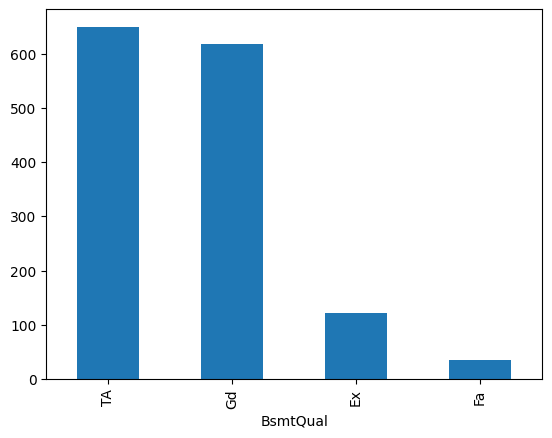

In [8]:
# BsmtQual
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

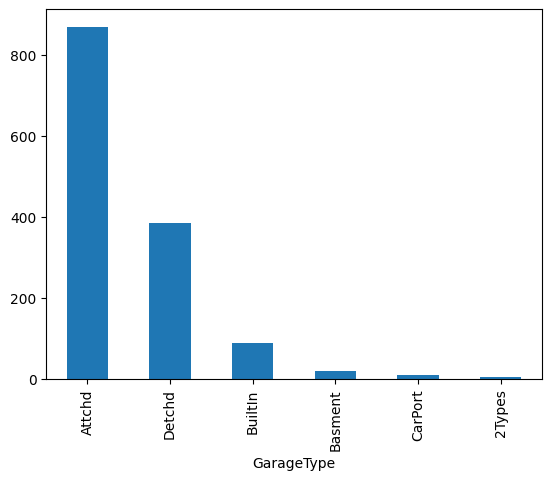

In [10]:
df['GarageType'].value_counts().plot.bar()

In [14]:
df['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [23]:
def impute_fun(df,variable):
    df[variable].fillna(df[variable].mode()[0],inplace=True)

In [24]:
for i in df.columns[:-1]:
    impute_fun(df,i)
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [25]:
df['GarageType'].value_counts()

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

Adding a variable for capturing NAN.

In [26]:
import numpy as np
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [27]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [28]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [29]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Replace the nan Values with the new feature.

In [34]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [31]:
def impute_nan(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'missing',df[variable])

In [35]:
for feature in df.columns[:-1]:
    impute_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [36]:
# Handle Categorical Variables.

In [37]:
import pandas as pd

In [39]:
# One-Hot Encoding.
df = pd.read_csv('titanic.csv',usecols=['Sex'])
df.columns

Index(['Sex'], dtype='object')

In [40]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [42]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


In [62]:
### mercedes data
df = pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [47]:
for feature in df.columns:
    print(len(df[feature].unique()))

47
27
44
7
4
29
12


In [63]:
df.X1.value_counts()[:10]

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [64]:
x1_top10 = list(df.X1.value_counts()[:10].index)
x1_top10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [65]:
for category in x1_top10:
    df[category] = np.where(df['X1']==category,1,0)


In [66]:
df[['X1']+x1_top10]

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,s,0,1,0,0,0,0,0,0,0,0
4205,o,0,0,0,0,0,0,0,0,0,1
4206,v,0,0,0,0,1,0,0,0,0,0
4207,r,0,0,0,0,0,1,0,0,0,0


This is the method when you have lot of feature in the dataset.